# Lesson 14 Regression: Understand the Models

**Regularization** was useful to improve ML models, or at least that's the goal.  

We noticed, regularization did not dramatically increase the $R2$ score of the fit all that much. In this section, we will cover the inner workings of exactly that.  

Once we fit the models, we can also look at the weights generated by the various model types. 

\begin{align}
    \text{Linear: } min_w ||y - Xw||_2^2 \\[0.25cm]
    \text{Ridge: } min_w ||y - Xw||_2^2 + \lambda ||w||_2^2 \\[0.25cm]
    \text{Lasso: } min_w ||y - Xw||_2^2 + \lambda ||w||_1^1 
\end{align}

We can visualize through a heat map to compare them easily.  

We do some **data scaling** here to prevent an imbalanced data set where categories with larger values carry heavier weight.  

We re-apply the regression types: linear, ridge, and lasso to the scaled data and compare to the original results.

# Imports

In [1]:
%cd ..

/Users/jaimemerizalde/Desktop/Library/Machine Learning Udemy Course


In [32]:
from Library import data
import pandas as pd
import numpy as np

import csv

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV 

# Get Data

In [13]:
df = data.get_data("Datasets/LifeExpectancy.csv", index_col=[0])
df

# Preprocess
categorical_columns = list(df.dtypes[df.dtypes=="O"].index.values)
categorical_columns

for col in categorical_columns:
    df[col] = df[col].astype("category")
df.drop(columns=categorical_columns, inplace=True)

X = df.loc[:, df.columns != "life_expectancy"]
y = df["life_expectancy"]

# Train test split"
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.33, random_state=42)

# Get Weights

We can rerun the analysis here or better yet, we can capture / save the analysis from its origins, then pull it in here.  

In [9]:
filepath = "Lesson 13 - Lasso Regression/lasso_cv_weights.csv"
lasso_cv_weights = data.load_weights(filepath)

filepath = "Lesson 12 - Ridge Regression/ridge_cv_weights.csv"
ridge_cv_weights = data.load_weights(filepath)

filepath = "Lesson 11 - Linear Regression/linear_regression_weights.csv"
linear_cv_weights = data.load_weights(filepath)

# Place in a dataframe.
weights = pd.DataFrame(
    {
        "linear": linear_cv_weights, 
        "ridge": ridge_cv_weights, 
        "lasso": lasso_cv_weights
    }, 
    index=X_train.columns # We have this here so we can call the data by the same name of how it appears in the original df.
)
weights.T

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
linear,-0.129179,-0.015504,0.109459,-0.099266,0.000470,-0.003087,-0.000021,0.023068,-0.079611,-0.001957,0.027271,0.015834,-0.448470,0.000003,-1.081427e-09,0.001099,-0.092011,10.140044,1.023914
ridge,-0.138838,-0.016472,0.098495,-0.115513,0.000311,-0.003963,-0.000020,0.026406,-0.071689,0.001376,0.059479,0.014371,-0.445590,0.000027,-3.213065e-09,-0.012716,-0.083056,10.672488,0.951866
lasso,-0.138934,-0.016475,0.098054,-0.115730,0.000311,-0.003958,-0.000020,0.026415,-0.071377,0.001380,0.059448,0.014384,-0.445613,0.000027,-3.189428e-09,-0.012691,-0.082986,10.675074,0.951954


# Visualizing Weights for Comparison

We will visualize using a heatmap here.

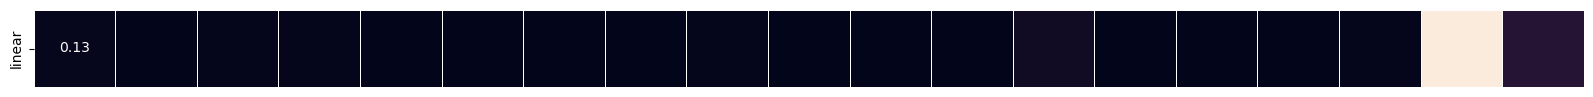

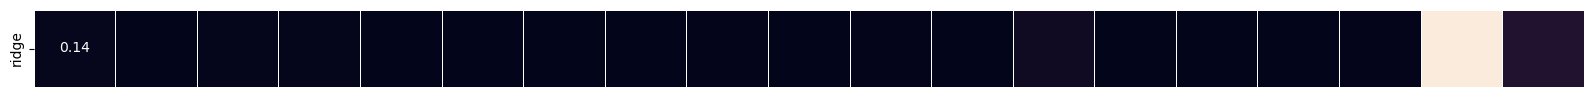

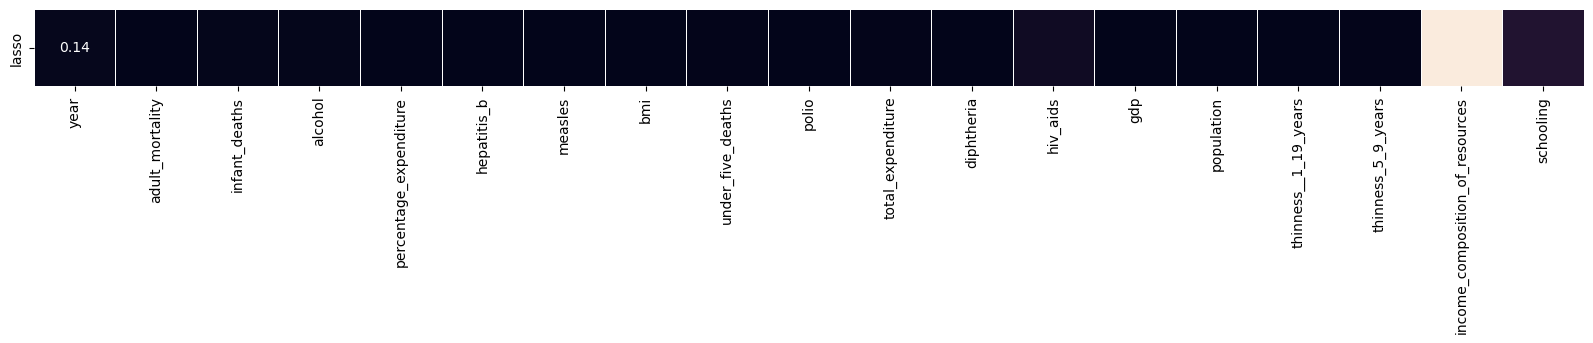

In [10]:
fig, ax = plt.subplots(figsize=(20, 1));

sns.heatmap(
    weights.T.loc[["linear"],:].abs(), 
    annot=True, linewidth=0.5, ax=ax, cbar=False,
    xticklabels=False
)
plt.figure(figsize=(20, 1))
sns.heatmap(
    weights.T.loc[["ridge"],:].abs(), 
    annot=True, linewidth=0.5, cbar=False,
    xticklabels=False
)
plt.figure(figsize=(20, 1))
sns.heatmap(
    weights.T.loc[["lasso"],:].abs(), 
    annot=True, linewidth=0.5, cbar=False,
    xticklabels=True
)

plt.show()

We can also visualize the 'X_train mean' as well. 

It may not be obvious since this backend is not doing so well, but there are a range of values here in the heatmap. There is a white-hot variable, and by comparison, everything else is a lot colder. 

The main idea here is then to SCALE the models so each feature / columns is not being weighted to heavily simply because of the size of the elements.

<Axes: >

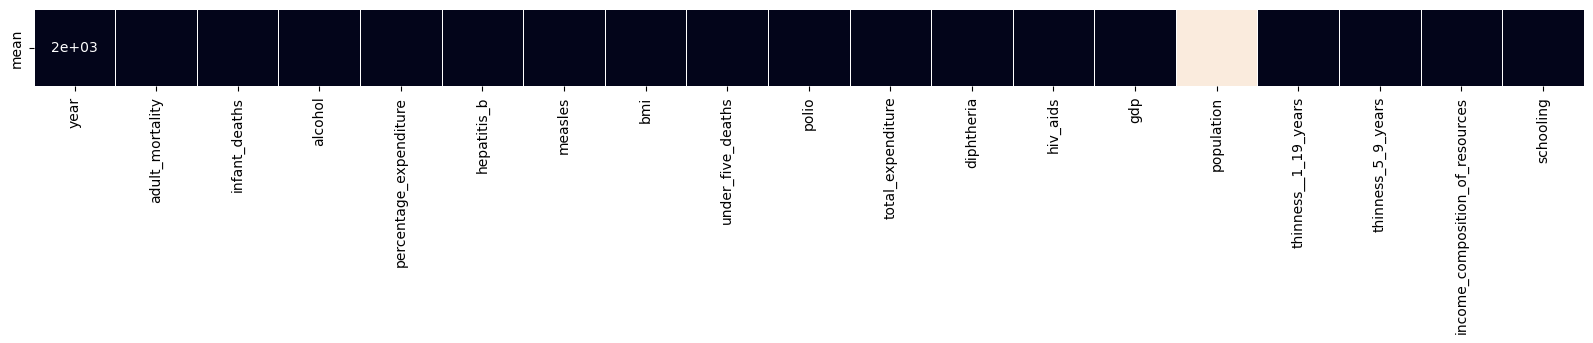

In [11]:
plt.figure(figsize=(20, 1))
sns.heatmap(
    X_train.mean().to_frame().T.rename(index={0: "mean"}), 
    annot=True, linewidth=0.5, cbar=False, xticklabels=True
)

# Scaling Data

Goal is to have all variables witht he same range. I'm using a custom data scaler from data.py in my library. Notice this scaling here is done on JUST the training data. The scaler has not been calibrated for the test data.

In [14]:
# NOTE: this will drop non-numerical columns and nans.
X_train, y_train, scaler = data.scale_data(X_train, y_train)
X_test, y_test, _ = data.scale_data(X_test, y_test, scaler=scaler) 

Original Size X: (1968, 19) y: (1968,)
Removed []
New Size X: (1123, 19) y: (1123,)
Original Size X: (970, 19) y: (970,)
Removed []
New Size X: (526, 19) y: (526,)


Preview how the values look now. Now look at this and see how much more smoothly values are distributed. 

<Axes: >

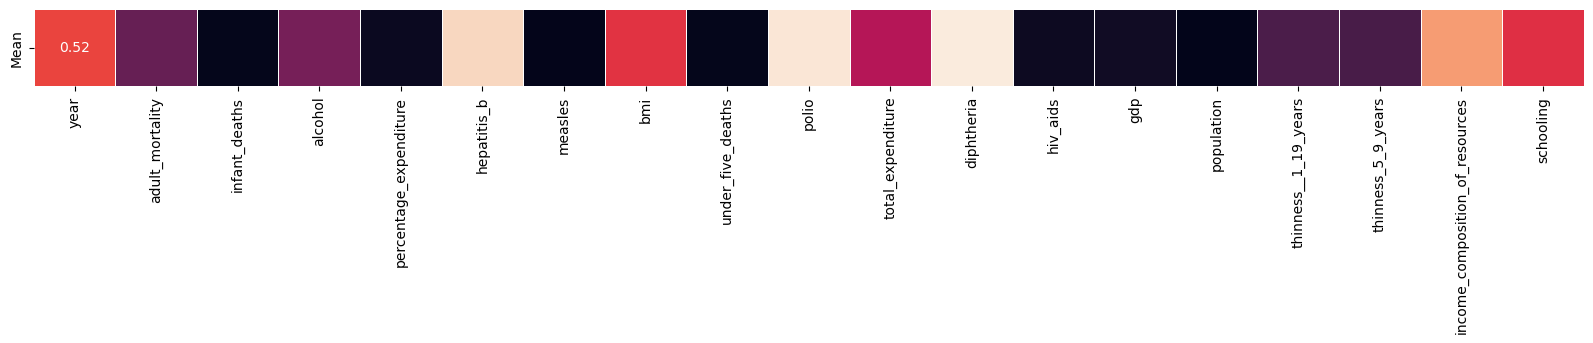

In [ ]:
plt.figure(figsize=(20, 1))

sns.heatmap(
    X_train.mean().to_frame().T.rename(index={0: "Mean"}), 
    annot=True, linewidth=0.5, cbar=False, xticklabels=True
)

# Apply Regression to Scaled Data

In [41]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV 
from sklearn.model_selection import cross_val_score

lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1, 10, 50, 100]

linear_scaled = LinearRegression().fit(X_train, y_train)
ridge_cv_scaled = RidgeCV(alphas=lambdas, cv=5).fit(X_train, y_train,)
lasso_cv_scaled = LassoCV(alphas=lambdas, cv=5).fit(X_train, y_train)

# Perform cross validation score checking.
r2_linear_scaled = np.mean(cross_val_score(linear_scaled, X_train, y_train, cv=5, scoring="r2"))
r2_ridge_scaled = np.mean(cross_val_score(ridge_cv_scaled, X_train, y_train, cv=5, scoring="r2"))
r2_lasso_scaled = np.mean(cross_val_score(lasso_cv_scaled, X_train, y_train, cv=5, scoring="r2"))

# Store the computed weights in a dataframe.
weigths = pd.DataFrame({"linear_scaled": linear_scaled.coef_, "ridge_scaled": ridge_cv_scaled.coef_, "lasso_scaled": lasso_cv_scaled.coef_}, index=X_train.columns)

/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.51154448309535, tolerance: 6.63787823719376
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.217559168804655, tolerance: 6.63787823719376
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96.7506262515235, tolerance: 7.180712988864145
  model = cd_fast.enet_c

We can see the weights are the same across all the modes of regression, with the exception of possibly thinness, but eeven then it is still small. 

In [42]:
weights.T

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
linear,-0.129179,-0.015504,0.109459,-0.099266,0.000470,-0.003087,-0.000021,0.023068,-0.079611,-0.001957,0.027271,0.015834,-0.448470,0.000003,-1.081427e-09,0.001099,-0.092011,10.140044,1.023914
ridge,-0.138838,-0.016472,0.098495,-0.115513,0.000311,-0.003963,-0.000020,0.026406,-0.071689,0.001376,0.059479,0.014371,-0.445590,0.000027,-3.213065e-09,-0.012716,-0.083056,10.672488,0.951866
lasso,-0.138934,-0.016475,0.098054,-0.115730,0.000311,-0.003958,-0.000020,0.026415,-0.071377,0.001380,0.059448,0.014384,-0.445613,0.000027,-3.189428e-09,-0.012691,-0.082986,10.675074,0.951954


Taking a look at the $R-squared$ values. Notice the Ridge regressoin scaled is now doing worse than the Linear scaled, albeit marginally. The lasso scaled is doing the best, but again, only just barely, according to the $R2$ score.

In [45]:
r2_results = pd.DataFrame({"linear_r2_scaled": r2_linear_scaled, "ridge_r2_scaled" : r2_ridge_scaled, "lasso_r2_scaled": r2_lasso_scaled}, index=["CV R2"])
r2_results

,linear_r2_scaled,ridge_r2_scaled,lasso_r2_scaled
CV R2,0.818749,0.818702,0.818842
